<a href="https://colab.research.google.com/github/iisc-scv/Generative-Adversarial-Network-GAN-/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GAN: Generative Advarsarial Network**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [4]:
mnist = tf.keras.datasets.mnist

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


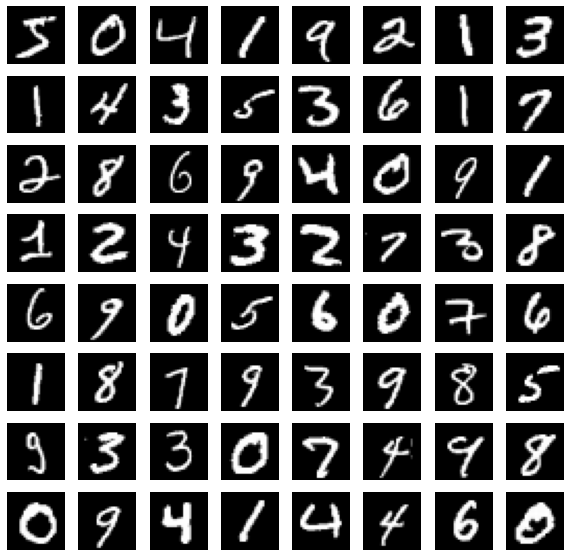

In [12]:
plt.figure(figsize=(10, 10))
for i in range(64):
  plt.subplot(8, 8, 1+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')

In [17]:
X_test = X_test /255
 

In [20]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [37]:
codings_size = 30
generator = keras.models.Sequential([
                                     keras.layers.Dense(128, activation ='selu', input_shape=[codings_size]),
           keras.layers.Dense(256, activation='selu'),
           keras.layers.Dense(28*28, activation='selu'),
           keras.layers.Reshape([28,28])
])
generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               3968      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               201488    
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 238,480
Trainable params: 238,480
Non-trainable params: 0
_________________________________________________________________


In [39]:
discriminator = keras.models.Sequential([
                                         keras.layers.Flatten(input_shape=[28,28]),
                                  
           keras.layers.Dense(256, activation='selu'),
           keras.layers.Dense(28*28, activation='selu'),
           keras.layers.Dense(1, activation='sigmoid')
])
discriminator.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 784)               201488    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 785       
Total params: 403,233
Trainable params: 403,233
Non-trainable params: 0
_________________________________________________________________


In [40]:
gan = keras.models.Sequential([generator, discriminator])
gan.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 28, 28)            238480    
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 403233    
Total params: 641,713
Trainable params: 641,713
Non-trainable params: 0
_________________________________________________________________


In [43]:
discriminator.compile(loss = 'binary_crossentropy', optimizer='rmsprop')
discriminator.trainable = False
gan.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop')

In [51]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs = 5):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    for X_batch in dataset:
      noise = tf.random.normal(shape = [batch_size, codings_size])
      generated_images = generator(noise)
      X_batch = tf.cast(X_batch, tf.float32)

      X_fake_and_real = tf.concat([generated_images, X_batch], axis =0)
      y1 = tf.constant([[0.]]*batch_size + [[1.]]*batch_size)

      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real, y1)

      noise = tf.random.normal(shape = [batch_size, codings_size])
      y2 = tf.constant([[1.]]*batch_size)

      discriminator.trainable = False
      gan.train_on_batch(noise, y2)



In [52]:
train_gan(gan, dataset, batch_size, codings_size)

In [53]:
noise = tf.random.normal(shape=[100, codings_size])
generated_images = generator(noise)
generated_images.shape

TensorShape([100, 28, 28])

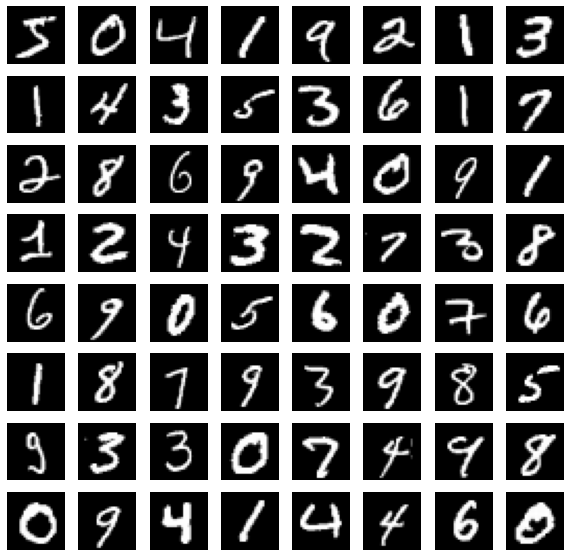

In [54]:
plt.figure(figsize=(10, 10))
for i in range(64):
  plt.subplot(8, 8, 1+i)
  plt.axis('off')
  plt.imshow(X_train[i], cmap = 'gray')